# Apply simple operations over multidimensional data

Reference notebook for the fourth task of the Climate Geospatial Analysis with Python and Xarray project on Coursera.

Instructor: Danilo Lessa Bernardineli (https://danlessa.github.io/)

---

- Welcome back! On this task, we are going to learn how to apply simple multidimensional operations, like subtracting and getting the mean. As we'll see, Xarray will allow to have an consistent experience even though we are handling several dimensions.
- So in order to start, let's open the task 4 notebook. Run the first blocks, and then open a new cell.

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [3]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 89, longitude: 142, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

- Let's see for instance how much the temperature has changed between nowadays and fourty years ago. What do you expect as a output when we ask that question? As we'll see, on Xarray, this means getting the difference between the temperature over all the existings dimensions except for the time, which means that we are going to have a temperature for each latitude and longitude for our data!
- To see what I mean, type with me. Temp change equals ds skt sel time equals 2019 01 01 minus ds skt sel time equals 1979 01 01. Temp change. Run it.

In [4]:
temp_change = (ds.skt.sel(time='2019-01-01') 
               - ds.skt.sel(time='1979-01-01'))

temp_change

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[ 1.2527466 ,  1.277832  ,  1.2758484 , ...,  0.03961182,
         0.1076355 ,  0.19018555],
       [ 1.1880188 ,  1.197937  ,  1.1669006 , ..., -0.01123047,
         0.01257324,  0.08056641],
       [ 1.0024719 ,  0.996521  ,  0.9423828 , ..., -0.04425049,
        -0.05215454, -0.00726318],
       ...,
       [-0.3295288 , -0.3163147 , -0.27075195, ...,  3.6135864 ,
         3.400299  ,  3.5396423 ],
       [-0.3942566 , -0.38238525, -0.36849976, ...,  3.4597168 ,
         3.4241028 ,  3.6142578 ],
       [-0.45632935, -0.5249939 , -0.51708984, ...,  3.402954  ,
         3.262268  ,  3.3210754 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

- Can you notice that we don't have the time coordinate anymore? What we do have is a temperature change for all our points, so let's visualize it! Open a new cell and write temp change plot. Run it.

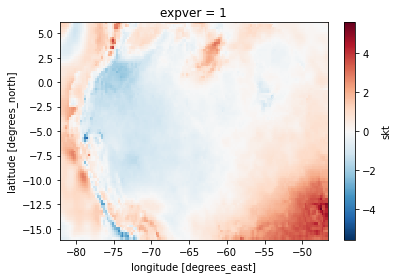

In [5]:
temp_change.plot()

- For the most part, the temperature has increased, however we do have some spots where the temperature actually got colder! That's the variable and localized part of climate change: a lot of places is going to be way hotter, and other places is actually to get a bit colder, and on average we have more hot places than cold places. Feel free to pause the video now and experiment with other date comparisons.


- Another thing that we can visualize is how the vegetation changes across seasons. In order to do that, type with me: sazonal change equals ds lai hv sel time 2019 07 01 minus ds lai hv sel time 2019 01 01. Sazonal change plot. Run it.

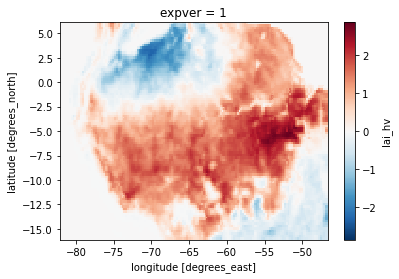

In [6]:
sazonal_change = (ds.lai_hv.sel(time='2019-07-01')
                  - ds.lai_hv.sel(time='2019-01-01'))
sazonal_change.plot()

- Red places have more vegetation density at July, and blue places have more density on January. This is another example of a geospatial insight that we can have. As again, feel free to pause the video and experiment with it.
- Now, let's go to another kind of operation: aggregations. Aggregations is a generalism that means that you are going to reduce one or more dimensions. You are going away with them. The most famous aggregation is the mean, which is akin to taking all the building a dimension and summing and dividing them.
- To see what I mean, open a new block and type with me: ds skt mean. Run it.

In [7]:
ds.skt.mean()

<xarray.DataArray 'skt' ()>
array(297.2683, dtype=float32)
Coordinates:
    expver   int32 1

- The mean of the temperature across all latitudes, longitudes and times is 297 Kelvin. We have reduced all the dimensions to a single number.
- Now let's reduce only at the time dimension, so that we still have the latitude and longitude. In order to do that, we most invoke the dim keyword on our aggregator, which is the mean. Let's open an new cell and type: mean temp ds skt mean dim equals time. Mean temp. Run it.

In [8]:
mean_temp = ds.skt.mean(dim='time')
mean_temp

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[300.8873 , 300.82703, 300.74887, ..., 300.67136, 300.66446,
        300.68234],
       [300.84076, 300.78116, 300.67752, ..., 300.68323, 300.6837 ,
        300.6877 ],
       [300.74652, 300.67358, 300.57083, ..., 300.68448, 300.693  ,
        300.69904],
       ...,
       [293.93396, 293.92303, 293.89307, ..., 296.69812, 296.79724,
        296.8227 ],
       [293.86404, 293.85193, 293.81693, ..., 296.30548, 296.46127,
        296.48813],
       [293.79874, 293.77878, 293.74445, ..., 296.21536, 296.3526 ,
        296.1909 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

- Did you notice that we now have values for both longitude and latitude? Now let's go further and visualize it. Open a new cell and type mean temp plot. Run it.

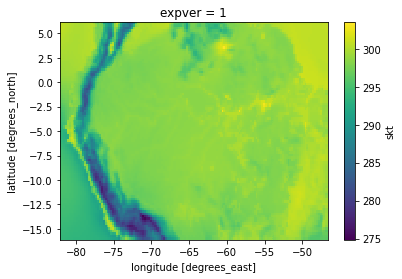

In [9]:
mean_temp.plot()

- Now we have an map for the mean temperature at each point on time. Another variation is to see how temperature changes across differing latitudes. To do that, open a new block and type: ds skt mean dim equals time longitude plot. Run it.

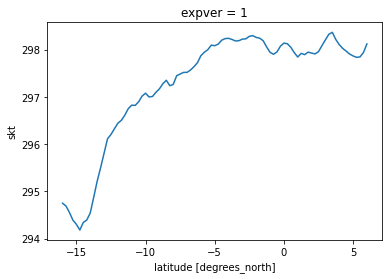

In [10]:
(ds.skt.mean(dim=['time', 'longitude'])).plot()

- The temperature is high near Latitude zero, which is the equator line, and then decreases when you go South. Intuitive isn't?
- We can also user other aggregators, like the standard deviation. To see it, open a new block and type: ds skt std dim time plot. RUn it.

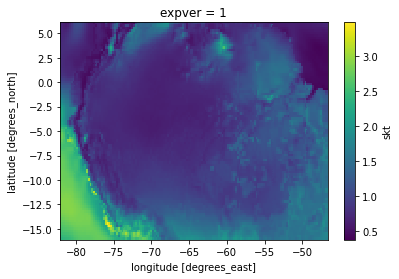

In [11]:
ds.skt.std(dim='time').plot()

- This says how much the temperature varies. Bright places have a lot of temperature variation
- Our last visualization is going to be the median temperature across time, so let's open a new block, type ds skt median dim latitude longitude plot. Run it.

/home/danlessa/.anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


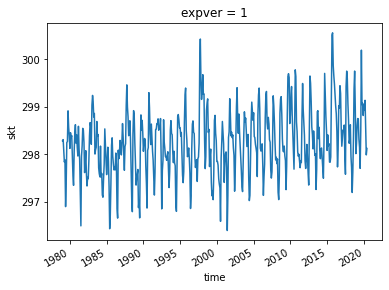

In [12]:
ds.skt.median(dim=['latitude', 'longitude']).plot()

- What's your conclusions about that last plot? Is the temperature increasing? Anyway, this is for this task, as now you know how to apply simple operations and aggregations over geospatial data. If you feel inclined, feel free to take your time to experiment those analysis for the other variables that we do have in the dataset. Anyway, on next task, we are going to see how to group and resample data so that we perform more complex operations and visualizations. See ya!

## Quiz

- You have a Dataset with the 'time', 'latitude' and 'longitude' dimensions, and you want to know what is the mean of the variables depending only on the 'latitude' dimensions. What of the following are valid ways to acquire that information?
    - [ ] ds.mean(dim=['time'])
    - [ ] ds.mean()
    - [ ] ds.mean(dim=['latitude'])
    - [x] ds.mean(dim=['time', 'longitude'])